In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
# 1. Excel-Datei laden
file_path = "output.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Datei erfolgreich geladen.")
except FileNotFoundError:
    print("Datei nicht gefunden. Stelle sicher, dass sie im richtigen Verzeichnis liegt.")
    df = None

Datei erfolgreich geladen.


In [16]:
# 2. Daten analysieren
if df is not None:
    # Alle Werte in der Spalte "Vergleich" splitten und zählen
    all_values = df["Vergleich"].dropna().str.split(",").explode().str.strip()
    all_values = all_values[all_values != "nan"]  # Entfernt explizite 'nan'-Strings
    value_counts = Counter(all_values)
    print("Analyse abgeschlossen:")
    print(value_counts)
    
    # Zusätzliche Analyse für Fälle mit Formeln in Spalte C
    df_formeln = df[df["Ground Truth"].notna() & (df["Ground Truth"] != "keine")]
    
    # Gesamtanzahl der betroffenen Zeilen mit einer Formel in Spalte C
    total_rows_with_formulas = len(df_formeln)
    print(f"Anzahl Zeilen mit Formeln in Spalte C: {total_rows_with_formulas}")
    
    formel_values = df_formeln["Vergleich"].dropna().str.split(",").explode().str.strip()
    formel_counts = Counter(formel_values)
    
    print("Analyse für Fälle mit Formeln in Spalte C:")
    for key in ["richtig", "FALSCH", "falsche formel"]:
        count = formel_counts.get(key, 0)
        percentage = (count / 75) * 100 if total_rows_with_formulas > 0 else 0
        print(f"{key}: {count} ({percentage:.2f}%)")
else:
    value_counts = None

Analyse abgeschlossen:
Counter({'richtig': 351, 'FALSCH': 31, 'falsche formel': 28})
Anzahl Zeilen mit Formeln in Spalte C: 31
Analyse für Fälle mit Formeln in Spalte C:
richtig: 34 (45.33%)
FALSCH: 13 (17.33%)
falsche formel: 28 (37.33%)


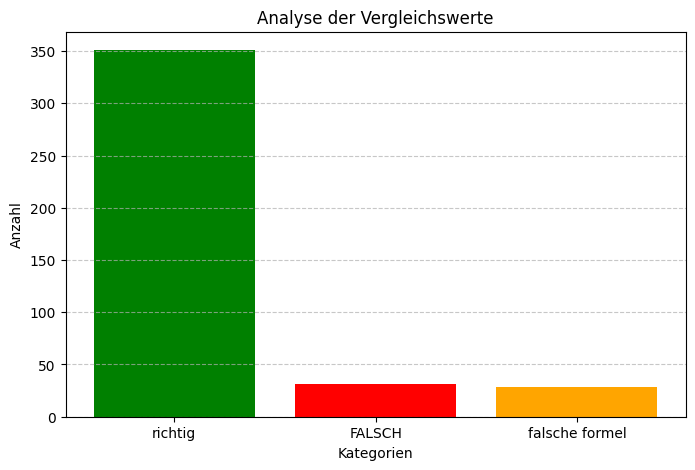

In [12]:
# 3. Balkendiagramm erstellen
if value_counts:
    plt.figure(figsize=(8, 5))
    plt.bar(value_counts.keys(), value_counts.values(), color=["green", "red", "orange"])
    plt.xlabel("Kategorien")
    plt.ylabel("Anzahl")
    plt.title("Analyse der Vergleichswerte")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Keine Daten zum Plotten verfügbar.")